# Phân Tích Độ Sâu Minimax và Thời Gian Ra Nước Đi

Trong notebook này, chúng ta khám phá mối quan hệ giữa tham số **độ sâu** (depth) của thuật toán Minimax và **thời gian ra nước đi** trong quá trình chơi Othello.

Về cơ bản, chúng ta cần hiểu thời gian mà AI cần để đưa ra mỗi nước đi. Giả thuyết cốt lõi dựa trên lý thuyết rằng độ phức tạp của thuật toán Minimax tăng theo cấp số nhân theo độ sâu. Cụ thể, chúng ta giả thuyết rằng thời gian ra nước đi tăng theo bậc: $\mathcal{O}(b^d)$, trong đó $b$ là độ phân nhánh của cây trò chơi và $d$ là độ sâu. Lưu ý rằng "thời gian ra nước đi" ở đây thực chất là thời gian thực hiện một chu trình tìm kiếm đầy đủ tại độ sâu cho trước.

Thông qua quá trình thu thập dữ liệu có hệ thống từ các trận đấu Othello sử dụng các tác tử Minimax, chúng ta xác nhận thực nghiệm mô hình tăng trưởng theo cấp số nhân này.

---

## Phân Tích Lý Thuyết

Phân tích lý thuyết xem xét cách mà thời gian ra nước đi (bao gồm cả thời gian tìm kiếm) của thuật toán Minimax tăng theo độ sâu trong trò chơi Othello. Cụ thể, mối quan hệ giả thuyết là $f(d) = T \cdot b^d$, trong đó $f(d)$ là thời gian ra nước đi ở độ sâu $d$. Cuối cùng, chúng ta xác minh mối quan hệ này thông qua dữ liệu thực nghiệm.

Mối Quan Hệ Giả Thuyết:

- **Gọi $f(d)$ là thời gian ra nước đi của thuật toán Minimax ở độ sâu $d$**.
- Độ phức tạp thời gian của thuật toán Minimax được kỳ vọng tuân theo: $f(d) = T \cdot b^d$, trong đó:
- $T$ là thời gian trung bình để đánh giá một node trong cây tìm kiếm,
- $b$ là hệ số phân nhánh (ước lượng $b \approx 10$ đối với Othello [1]).
- Lưu ý rằng điểm chính của mối quan hệ này là bản chất theo cấp số nhân.

Ước Lượng Tham Số:

- Để khảo sát mối quan hệ giả thuyết này, chúng ta ghi lại thời gian ra nước đi tại độ sâu $d = 1$ và ghi nhận: $f(1) = T \cdot b$.
- Sử dụng biểu thức trên và hệ số phân nhánh đã nêu ($b \approx 10$), chúng ta ước lượng giá trị của $T$.

Xác Minh:

- Sau khi ước lượng, chúng ta tiến hành xác minh thực nghiệm để so sánh giữa mối quan hệ lý thuyết và dữ liệu quan sát được.
- Việc xác minh thành công sẽ củng cố hiểu biết của chúng ta về cách thời gian ra nước đi của Minimax tăng theo độ sâu trong Othello.

### Tài Liệu Tham Khảo

[1] Norvig, P. (1992) '[Search and the Game of Othello](https://www.sciencedirect.com/science/article/abs/pii/B9780080571157500182)', trong *Paradigms of Artificial Intelligence Programming: Case Studies in Common Lisp*, tr. 596–654. doi: 10.1016/B978-0-08-057115-7.50018-2.

---


## Load Source Code

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
os.chdir(project_root)

from src.gameLogic.game import Game
from src.gameLogic.board import SquareType
from src.gameLogic.player import Player, PlayerType
from src.ai.minimax.evaluator import StateEvaluator, HeuristicType

## Timing Function

In [ ]:
import time

def recordMinimaxMoveTimes_FixedDepth(depth):
    state_eval = StateEvaluator(weights={
        HeuristicType.DISC_DIFF: 5/60,
        HeuristicType.MOBILITY: 15/60,
        HeuristicType.CORNERS: 40/60
    })
        
    minimax = Player(PlayerType.MINIMAX, SquareType.BLACK, state_eval, depth)
    random = Player(PlayerType.RANDOM, SquareType.WHITE)
    game = Game(minimax, random)
    
    # List to store move times
    minimax_move_times = []
    while not game.is_finished:
        # Black's turn (i.e. Minimax)
        if game.active == game.player_black:
            start_time = time.time()
            game.get_player_move()
            end_time = time.time()
            
            minimax_move_time = end_time - start_time
            minimax_move_times.append(minimax_move_time)
        else:
            game.get_player_move()
            
        game.make_move()
        game.change_turn()
        game.update_valid_moves()
        game.update_scores()
    
        game.check_finished()

    return minimax_move_times

## Parameter Estimation

- Muốn ước lượng giá trị $T$, tức là thời gian trung bình để đánh giá một node trong cây tìm kiếm  
- Ghi lại thời gian ra nước đi tại độ sâu $d = 1$,  $\quad$ tức là thu thập dữ liệu quan sát và so sánh với $f(1) = T \cdot b$, $\quad$ hay $\quad T = \frac{f(1)}{b}$.


In [3]:
import numpy as np
from tqdm import tqdm
from IPython.display import display, Math

# Simulate many games for reliability
NUM_GAMES = 15
all_move_times = []

for _ in tqdm(range(NUM_GAMES)):
    # Record move-times at depth d=1
    move_times = recordMinimaxMoveTimes_FixedDepth(depth=1)
    all_move_times.extend(move_times)
print("Recorded move-times at depth d=1.")

100%|██████████| 15/15 [00:07<00:00,  1.99it/s]

Recorded move-times at depth d=1.


- Sử dụng công thức trên và b ≈ 10, ta xấp xỉ khoảng tin cậy 95% cho T theo công thức: T̄ ± 2 × SE_T̄.  
- Lưu ý rằng T̄ được lưu dưới biến `T_bar`, và SE_T̄ được lưu dưới biến `SE`.


In [4]:
# Define branching factor
b = 10

# Calculate sample mean and std dev of T 
T_bar = np.mean(all_move_times) / b
std_dev = np.std(all_move_times) / b

# Calculate standard error of T_bar
SE = std_dev / np.sqrt(len(all_move_times))

# Display estimate and interval
display(Math(f"\\bar{{T}} \\pm 2 \\cdot \\text{{SE}}_{{\\bar{{T}}}}"))
display(Math(f"= {T_bar:.5f} \\pm {2 * SE:.5f}"))
display(Math(f"= [{T_bar - 2 * SE:.5f}, {T_bar + 2 * SE:.5f}]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- Về cơ bản, ước lượng của chúng ta cho $T$ nằm trong khoảng $[T_{\text{mean}} - 2 \cdot SE, \; T_{\text{mean}} + 2 \cdot SE]$.  
- Tức là, **thời gian trung bình để đánh giá một nút trong cây tìm kiếm** nằm trong khoảng $[T_{\text{mean}} - 2 \cdot SE, \; T_{\text{mean}} + 2 \cdot SE]$, như đã tính ở trên.

## Validation

- Thực hiện kiểm chứng thực nghiệm bằng cách so sánh mối quan hệ lý thuyết với dữ liệu quan sát được.  
- Trước tiên, thu thập một tập hợp thời gian di chuyển khác, lần này ở nhiều độ sâu khác nhau.  
- Tính thời gian di chuyển trung bình cho từng độ sâu cụ thể và lưu vào từ điển `move_time_sample_means`.

In [5]:
# Simulate only a couple of games at each depth
# (Exponential relationship largely increases time-taken at higher depths)
NUM_GAMES = 2
d_range = np.arange(1, 6)
all_move_times = {d: [] for d in d_range}

for d in tqdm(d_range):
    for _ in tqdm(range(NUM_GAMES)):
        move_times = recordMinimaxMoveTimes_FixedDepth(depth=d)
        all_move_times[d].extend(move_times)

# Calculate sample mean move time for each depth in d_range
move_time_sample_means = {d: np.mean(move_times) for d, move_times in all_move_times.items()}
move_time_sample_means

100%|██████████| 5/5 [21:43<00:00, 260.66s/it]


{np.int64(1): np.float64(0.017770595237857005),
 np.int64(2): np.float64(0.10674862464269003),
 np.int64(3): np.float64(0.5494956890741984),
 np.int64(4): np.float64(4.027326380052874),
 np.int64(5): np.float64(16.596859036899005)}

In [6]:
import json

all_move_times_dict = {str(key): value for key, value in all_move_times.items()}
# Save the dictionary as a JSON file
with open("src/experiments/all_move_times_dict.json", "w") as json_file:
    json.dump(all_move_times_dict, json_file)

- Sau khi ước lượng, ta thực hiện kiểm chứng thực nghiệm để so sánh mối quan hệ lý thuyết với dữ liệu quan sát được.  
- Vẽ biểu đồ thể hiện mối quan hệ lý thuyết (sử dụng giá trị ước lượng của $T$, tức là $\bar{T}$) so với dữ liệu quan sát được.

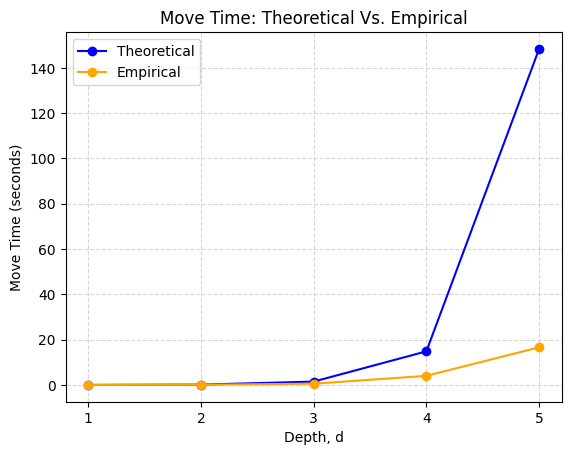

In [7]:
import matplotlib.pyplot as plt

# Depth range and move_time_sample_means dictionary
d_range = np.arange(1, 6)

theoretical_move_times = T_bar * b**d_range
empirical_move_times = list(move_time_sample_means.values())

# Plot the mean value for T (T_bar) against move_time_sample_means
plt.plot(d_range, theoretical_move_times, label='Theoretical', color='blue', marker='o')
plt.plot(d_range, empirical_move_times, label='Empirical', color='orange', marker='o')

plt.xlabel('Depth, d')
plt.ylabel('Move Time (seconds)')
plt.title('Move Time: Theoretical Vs. Empirical')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xticks(d_range)
plt.show()

- Dữ liệu quan sát phù hợp với lý thuyết.  
- Xác nhận hiểu biết của chúng ta về cách thời gian di chuyển của thuật toán Minimax tăng theo độ sâu trong trò chơi Othello.  
- Ngoài ra, điều này cũng cho thấy rằng $d = 3$ hoặc $4$ là một độ sâu phù hợp để người dùng thi đấu với AI.
